In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pickle


In [2]:
df = pd.read_csv('data/node_database.csv')
df = df.drop(df.columns[0], axis=1)

print(df.shape)

df.head(20)

(1572264, 60)


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,9.87,7.00,6.11,89.0,4.0,11.500000,0.000000,8.1,4.340000,78.0,...,0.824,1.29,0.90,0.77,0.92,0.90,1.00,8.3,8.25,100.0
1,9.11,10.07,5.63,181.0,2.0,18.030001,1.610000,6.2,31.530001,84.0,...,1.109,0.72,1.25,1.05,1.53,1.68,1.08,3.2,2.92,41.0
2,9.76,7.00,6.04,131.0,3.0,21.400000,0.130000,5.2,19.059999,88.0,...,0.886,0.97,1.45,0.51,1.81,1.54,2.60,5.2,5.96,96.0
3,9.87,7.00,6.11,89.0,4.0,11.500000,0.000000,8.1,4.340000,78.0,...,0.824,1.29,0.90,0.77,0.92,0.90,1.00,8.3,8.25,100.0
4,8.90,10.28,9.47,146.0,2.0,15.710000,49.500000,11.3,21.290001,87.0,...,0.897,1.23,0.77,0.96,0.70,0.74,0.59,5.7,5.84,56.0
5,9.13,7.00,5.65,146.0,2.0,14.450000,3.530000,10.5,17.559999,87.0,...,0.947,1.27,0.80,0.98,0.95,1.18,0.28,4.0,3.93,93.0
6,9.09,13.20,10.76,174.0,6.0,14.280000,52.000000,10.5,26.660000,95.0,...,0.893,0.96,0.99,0.88,0.93,1.02,0.68,5.7,5.53,65.0
7,9.13,7.00,5.65,146.0,2.0,14.450000,3.530000,10.5,17.559999,87.0,...,0.947,1.27,0.80,0.98,0.95,1.18,0.28,4.0,3.93,93.0
8,9.76,7.00,6.04,131.0,3.0,21.400000,0.130000,5.2,19.059999,88.0,...,0.886,0.97,1.45,0.51,1.81,1.54,2.60,5.2,5.96,96.0
9,9.15,7.00,5.68,105.0,6.0,9.470000,1.670000,9.2,6.350000,107.0,...,1.130,0.82,0.95,1.32,0.82,0.87,0.70,6.9,6.56,120.0


In [6]:
# Scale the DataFrame using the MinMaxScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Perform PCA on the scaled DataFrame
pca = PCA(n_components=20)
transformed_df = pca.fit_transform(scaled_df)

In [7]:
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_))


[0.53858579 0.13152223 0.0925611  0.0578611  0.04640143 0.0257817
 0.01978616 0.01714109 0.01676705 0.0129539  0.00976257 0.00793201
 0.00612063 0.00404051 0.00350528 0.0032669  0.00199125 0.00184553
 0.00126377 0.00091002]
[0.53858579 0.67010802 0.76266912 0.82053022 0.86693164 0.89271334
 0.9124995  0.92964059 0.94640765 0.95936154 0.96912411 0.97705611
 0.98317674 0.98721725 0.99072253 0.99398943 0.99598068 0.99782621
 0.99908998 1.        ]


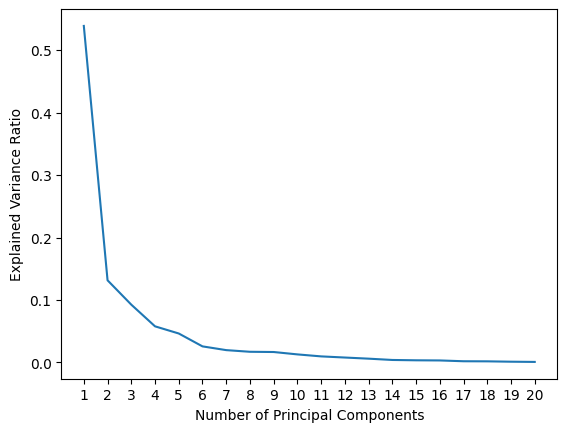

In [9]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')

plt.xticks(range(len(pca.explained_variance_ratio_)), range(1, len(pca.explained_variance_ratio_) + 1))

plt.show()

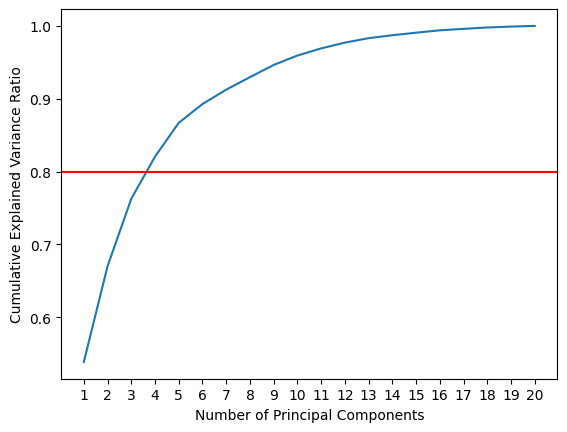

In [14]:
# Plot the cumulative explained variance ratio
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xticks(range(len(pca.explained_variance_ratio_)), range(1, len(pca.explained_variance_ratio_) + 1))

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')

plt.axhline(y=0.8, color='r', linestyle='-')


plt.show()


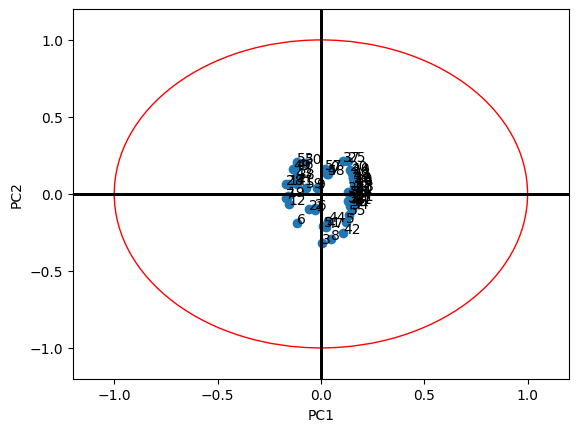

In [5]:
# Get the loadings of the first two components
loadings = pca.components_[:2,:]

# Plot the circle of correlations
fig, ax = plt.subplots()
ax.scatter(loadings[0,:], loadings[1,:])

# Add labels for the original features
for i, feature in enumerate(df.columns):
    ax.annotate(feature, (loadings[0,i], loadings[1,i]))
    
ax.axhline(0, color='black', lw=2)
ax.axvline(0, color='black', lw=2)

# Add a circle to indicate the size of the correlation
circle = plt.Circle((0, 0), radius=1, color='red', fill=False)
ax.add_artist(circle)

ax.set_xlim([-1.2, 1.2])
ax.set_ylim([-1.2, 1.2])

ax.axhline(0, color='black', lw=2)
ax.axvline(0, color='black', lw=2)


# Set the axis labels
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

# Show the plot
plt.show()


### Save this data for further use

In [6]:
features = pickle.load(open('data/features.pkl', 'rb'))
pca_features = list()

In [7]:
current_node = 0
for feat in features:
    n = feat.shape[0]
    corresponding_pca_features =transformed_df[current_node:current_node+n]
    pca_features.append(np.array(corresponding_pca_features))
    current_node +=n

In [9]:
pickle.dump(pca_features, open('data/pca_nodes_attributes.pkl', 'wb'))

In [8]:
pca_features[0].shape

(327, 4)